# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #2980B9; text-align: center; line-height: 1.25;"><b>Heart Disease<span style="color: #000000"> EDA & Prediction</span></b><br><span style="color: #1A5276; font-size: 24px">with Various Machine Learning Models </span></h1>
<hr>
​

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Columns Description</h1>
<hr>

<ol start="1">
  <li>age</li>
  <li>sex</li>
  <li>chest pain type (4 values)</li>
  <li>resting blood pressure</li>
  <li>serum cholestoral in mg/dl</li>
  <li>fasting blood sugar > 120 mg/dl</li>
  <li>resting electrocardiographic results (values 0,1,2)</li>
  <li>maximum heart rate achieved</li>
  <li>exercise induced angina</li>
  <li>oldpeak = ST depression induced by exercise relative to rest</li>
  <li>the slope of the peak exercise ST segment</li>
  <li>number of major vessels (0-3) colored by flourosopy</li>
  <li>thal: 0 = normal; 1 = fixed defect; 2 = reversable defect</li>
</ol>

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Import Essential Libraries</h1>
<hr>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML as html_print

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Load Dataset</h1>
<hr>

In [6]:
heart_dataset = pd.read_csv("heart.csv")

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Showing Dataset</h1>
<hr>

In [9]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
heart_dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [11]:
heart_dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
507,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
134,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1
711,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
961,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
953,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1


# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Dataset Info</h1>
<hr>

In [12]:
heart_dataset.info(memory_usage = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Checking Null Values</h1>
<hr>

In [13]:
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Statistical Description of Dataset</h1>
<hr>

In [14]:
heart_dataset[['age','trestbps','chol','thalach','oldpeak','target']].describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
age,1025.000000,54.434146,9.072290,29.000000,48.000000,56.000000,61.000000,77.000000
trestbps,1025.000000,131.611707,17.516718,94.000000,120.000000,130.000000,140.000000,200.000000
chol,1025.000000,246.000000,51.592510,126.000000,211.000000,240.000000,275.000000,564.000000
thalach,1025.000000,149.114146,23.005724,71.000000,132.000000,152.000000,166.000000,202.000000
oldpeak,1025.000000,1.071512,1.175053,0.000000,0.000000,0.800000,1.800000,6.200000
target,1025.000000,0.513171,0.500070,0.000000,0.000000,1.000000,1.000000,1.000000


# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Visualization of Chest Pain Type</h1>
<hr>

In [15]:
cpdf = pd.DataFrame(heart_dataset['cp'].value_counts())
cpdf.sort_values(by='cp', ascending=False).style.background_gradient(cmap='Blues')

,cp
0,497
2,284
1,167
3,77


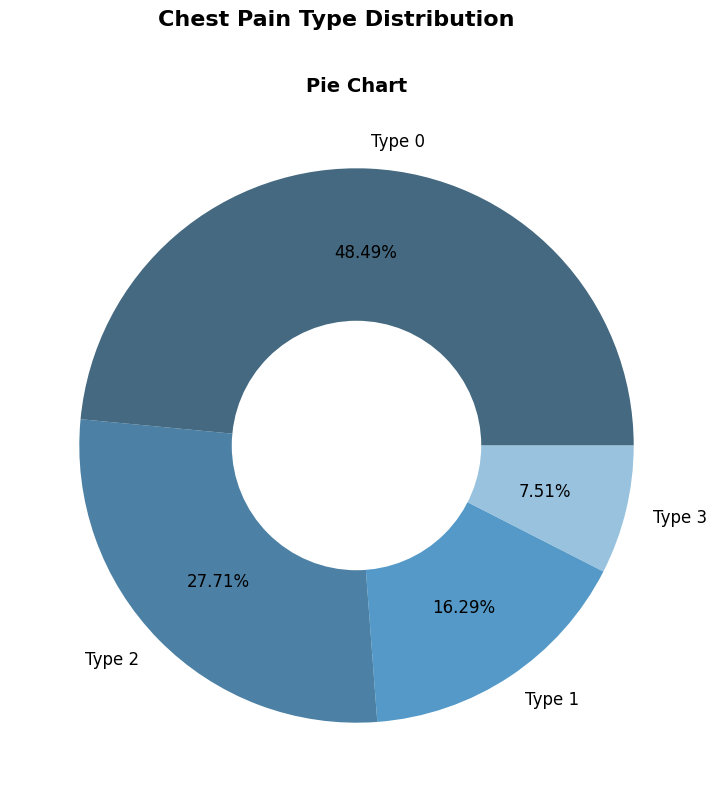

In [16]:
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=heart_dataset['cp'].value_counts().index

colors = ['#154360','#1F618D','#2980B9','#7FB3D5']

plt.figure(figsize=(16, 9))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=16,
             fontfamily='sans-serif')

plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif')
plt.pie(heart_dataset['cp'].value_counts(), pctdistance=0.7, labels=labels,
        autopct='%.2f%%', textprops={'fontsize':12}, colors=colors, wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Visualization of thal (A blood disorder called thalassemia) Type</h1>
<hr>

In [17]:
thaldf = pd.DataFrame(heart_dataset['thal'].value_counts())
thaldf.sort_values(by='thal', ascending=False).style.background_gradient(cmap='Blues')

,thal
2,544
3,410
1,64
0,7


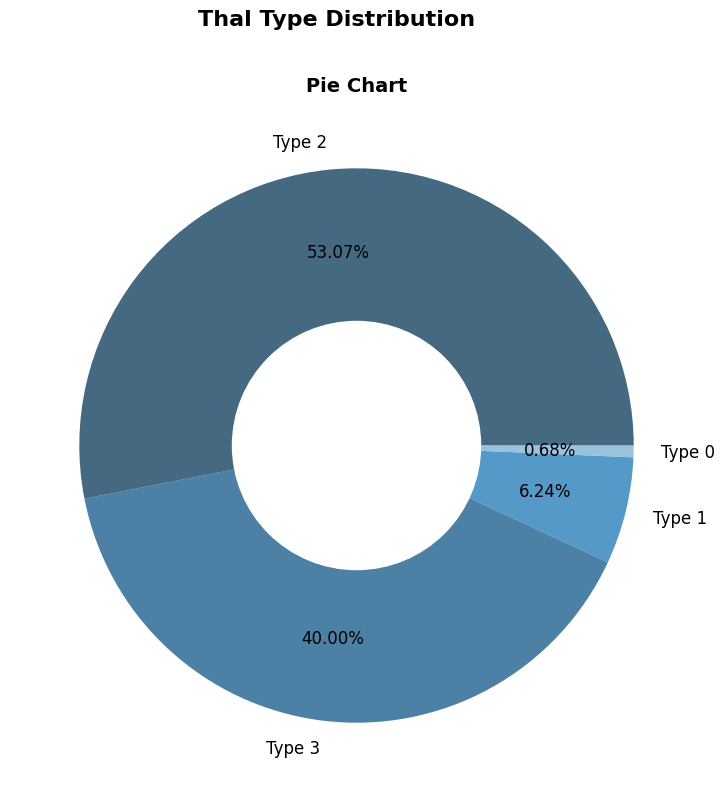

In [18]:
labels=['Type 2', 'Type 3', 'Type 1', 'Type 0']
order=heart_dataset['thal'].value_counts().index

colors = ['#154360','#1F618D','#2980B9','#7FB3D5']

plt.figure(figsize=(16, 9))
plt.suptitle('Thal Type Distribution', fontweight='heavy', fontsize=16,
             fontfamily='sans-serif')

plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif')
plt.pie(heart_dataset['thal'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', textprops={'fontsize':12}, colors=colors, wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Visualization of slope (the slope of the peak exercise ST segment) Type</h1>
<hr>

In [19]:
slopedf = pd.DataFrame(heart_dataset['slope'].value_counts())
slopedf.sort_values(by='slope', ascending=False).style.background_gradient(cmap='Blues')

,slope
1,482
2,469
0,74


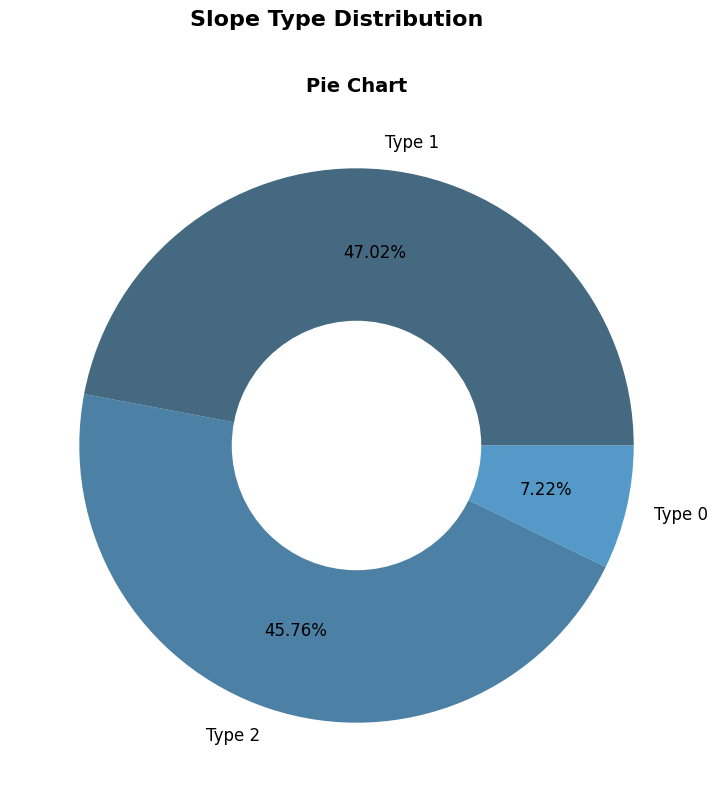

In [20]:
labels=['Type 1', 'Type 2', 'Type 0']
order=heart_dataset['slope'].value_counts().index

colors = ['#154360','#1F618D','#2980B9']

plt.figure(figsize=(16, 9))
plt.suptitle('Slope Type Distribution', fontweight='heavy', fontsize=16,
             fontfamily='sans-serif')

plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif')
plt.pie(heart_dataset['slope'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', textprops={'fontsize':12}, colors=colors, wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Visualization of Heart Disease distribution based on Gender</h1>
<hr>

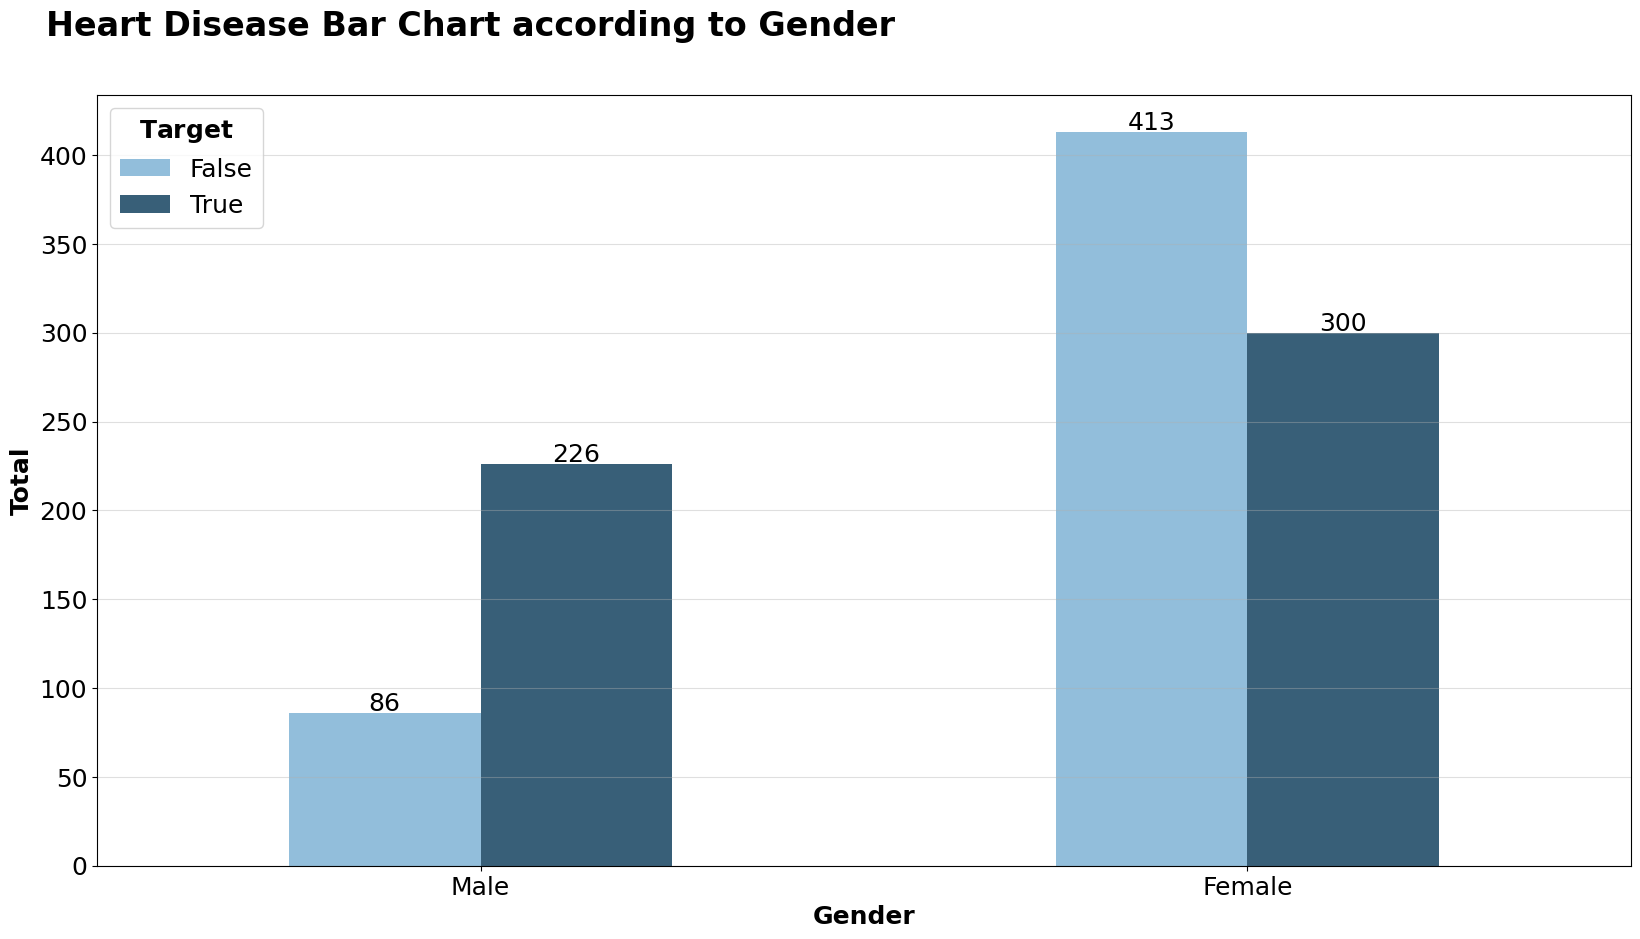

In [21]:
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']

colors = ['#7FB3D5', '#154360']

ax = pd.crosstab(heart_dataset.sex, heart_dataset.target).plot(kind='bar', color=colors, figsize=(16, 9), alpha=0.85)

for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+1.25,rect.get_height(),
             horizontalalignment='center', fontsize=18)

plt.suptitle('Heart Disease Bar Chart according to Gender', fontweight='700',
             x=0, y=1.05, ha='left', fontsize='24', fontfamily='sans-serif')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])

plt.xlabel('Gender', fontfamily='sans-serif', fontweight='bold', fontsize='18')

plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold', fontsize='18')

plt.xticks(label_gender, label_gender2, rotation=0, fontsize='18')

plt.yticks(rotation=0, fontsize='18')

plt.grid(axis='y', alpha=0.4)

plt.grid(axis='x', alpha=0)

plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='18',
           title_fontsize='18', loc='upper left', frameon=True);

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Visualization of Heart Disease distribution based on Chest Pain type</h1>
<hr>

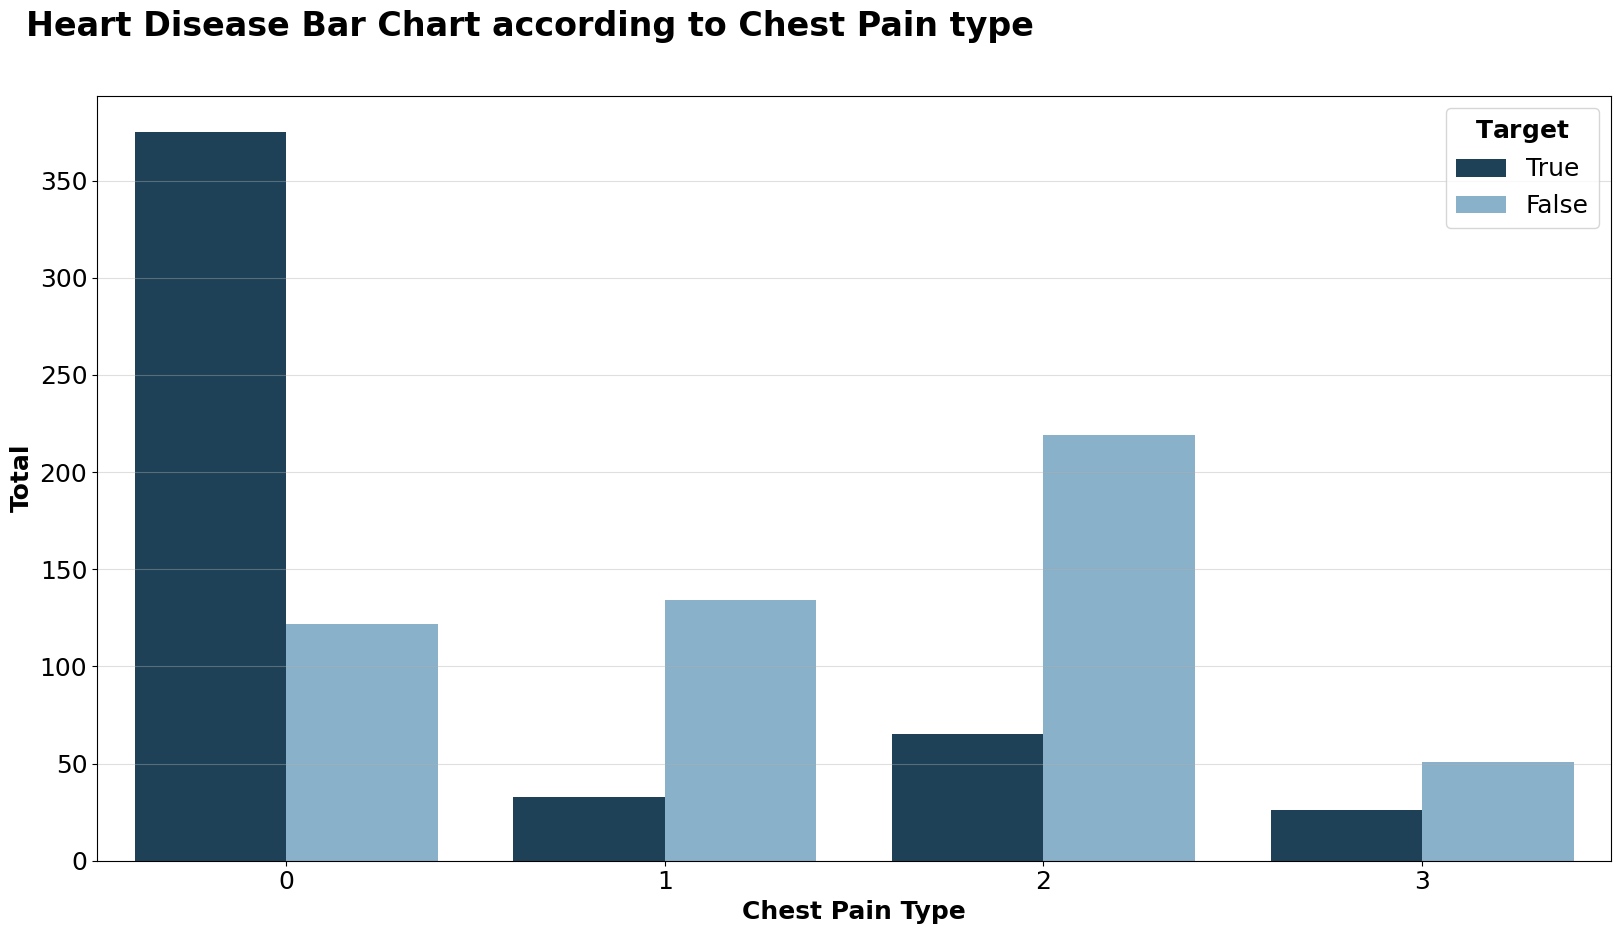

In [22]:
labels = ['True', 'False']

colors = ['#154360','#7FB3D5']

plt.figure(figsize=(16, 9))

sns.countplot(data= heart_dataset, x='cp',hue='target', palette=colors)

plt.suptitle('Heart Disease Bar Chart according to Chest Pain type', fontweight='700',
             x=0, y=1.05, ha='left', fontsize='24', fontfamily='sans-serif')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])

plt.xlabel('Chest Pain Type', fontfamily='sans-serif', fontweight='bold', fontsize='18')

plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold', fontsize='18')

plt.xticks(rotation=0, fontsize='18')

plt.yticks(rotation=0, fontsize='18')

plt.grid(axis='y', alpha=0.4)

plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='18',
           title_fontsize='18', loc='upper right', frameon=True);

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Visualization of Heart Disease distribution based on Thalassemia type</h1>
<hr>

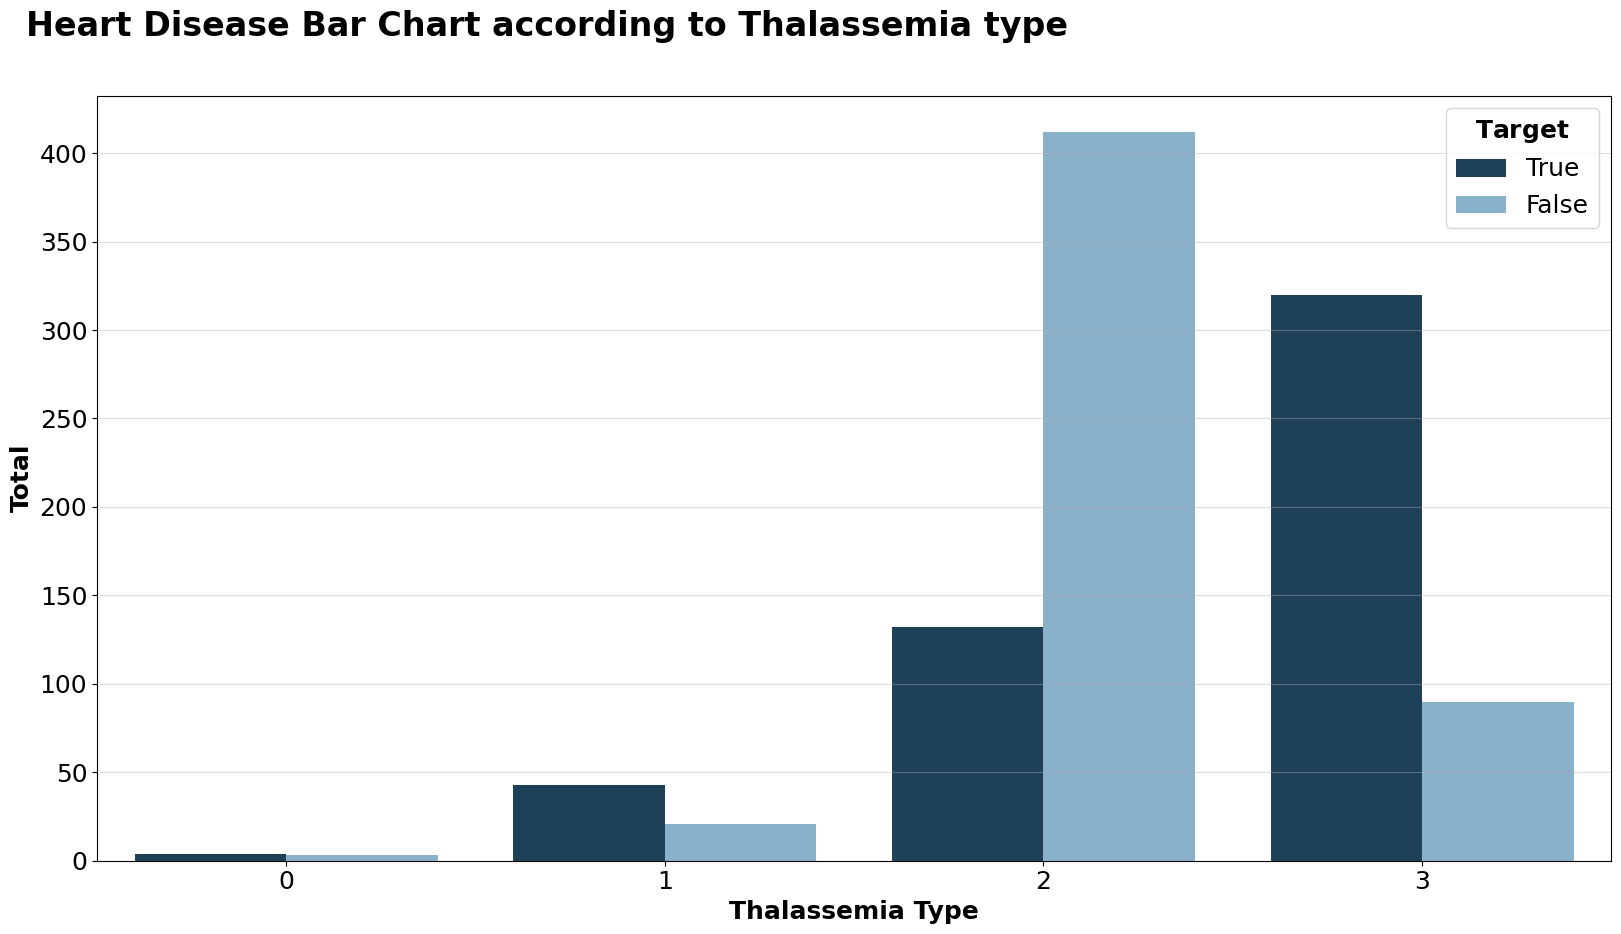

In [ ]:
labels = ['True', 'False']

colors = ['#154360','#7FB3D5']

plt.figure(figsize=(16, 9))

sns.countplot(data= heart_dataset, x='thal',hue='target', palette=colors)

plt.suptitle('Heart Disease Bar Chart according to Thalassemia type', fontweight='700',
             x=0, y=1.05, ha='left', fontsize='24', fontfamily='sans-serif')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])

plt.xlabel('Thalassemia Type', fontfamily='sans-serif', fontweight='bold', fontsize='18')

plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold', fontsize='18')

plt.xticks(rotation=0, fontsize='18')

plt.yticks(rotation=0, fontsize='18')

plt.grid(axis='y', alpha=0.4)

plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='18',
           title_fontsize='18', loc='upper right', frameon=True);

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Visualization of Heart Disease distribution based on Slope type</h1>
<hr>

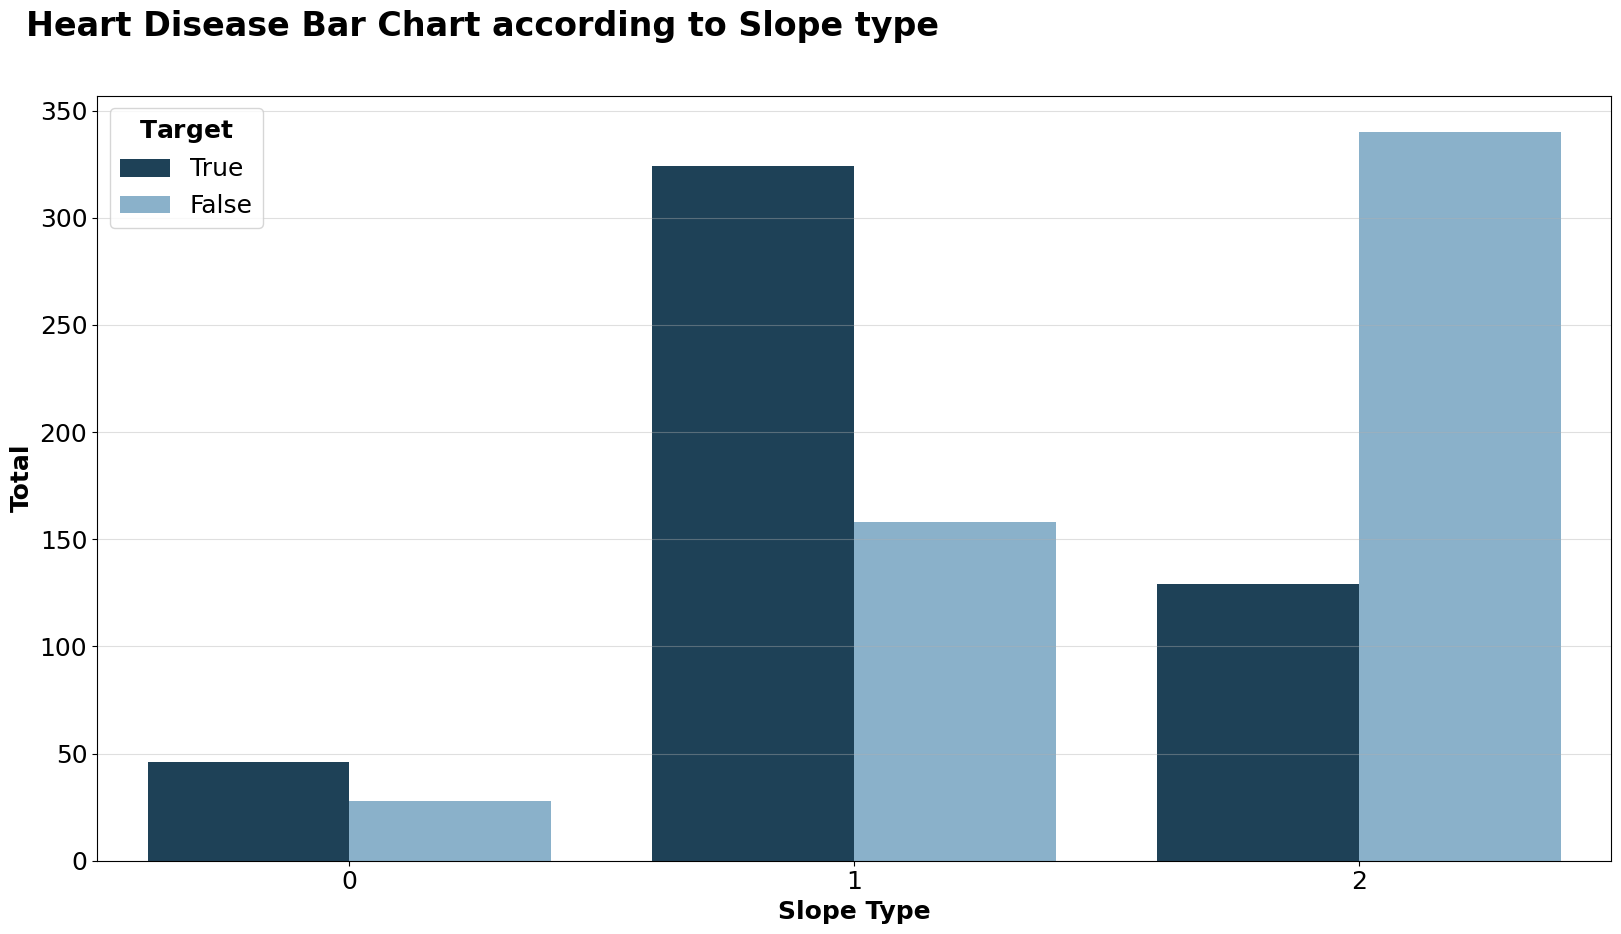

In [ ]:
labels = ['True', 'False']

colors = ['#154360','#7FB3D5']

plt.figure(figsize=(16, 9))

sns.countplot(data= heart_dataset, x='slope',hue='target', palette=colors)

plt.suptitle('Heart Disease Bar Chart according to Slope type', fontweight='700',
             x=0, y=1.05, ha='left', fontsize='24', fontfamily='sans-serif')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])

plt.xlabel('Slope Type', fontfamily='sans-serif', fontweight='bold', fontsize='18')

plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold', fontsize='18')

plt.xticks(rotation=0, fontsize='18')

plt.yticks(rotation=0, fontsize='18')

plt.grid(axis='y', alpha=0.4)

plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='18',
           title_fontsize='18', loc='upper left', frameon=True);

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Visualization of Heart Disease distribution based on Major Vessel (ca) type</h1>
<hr>

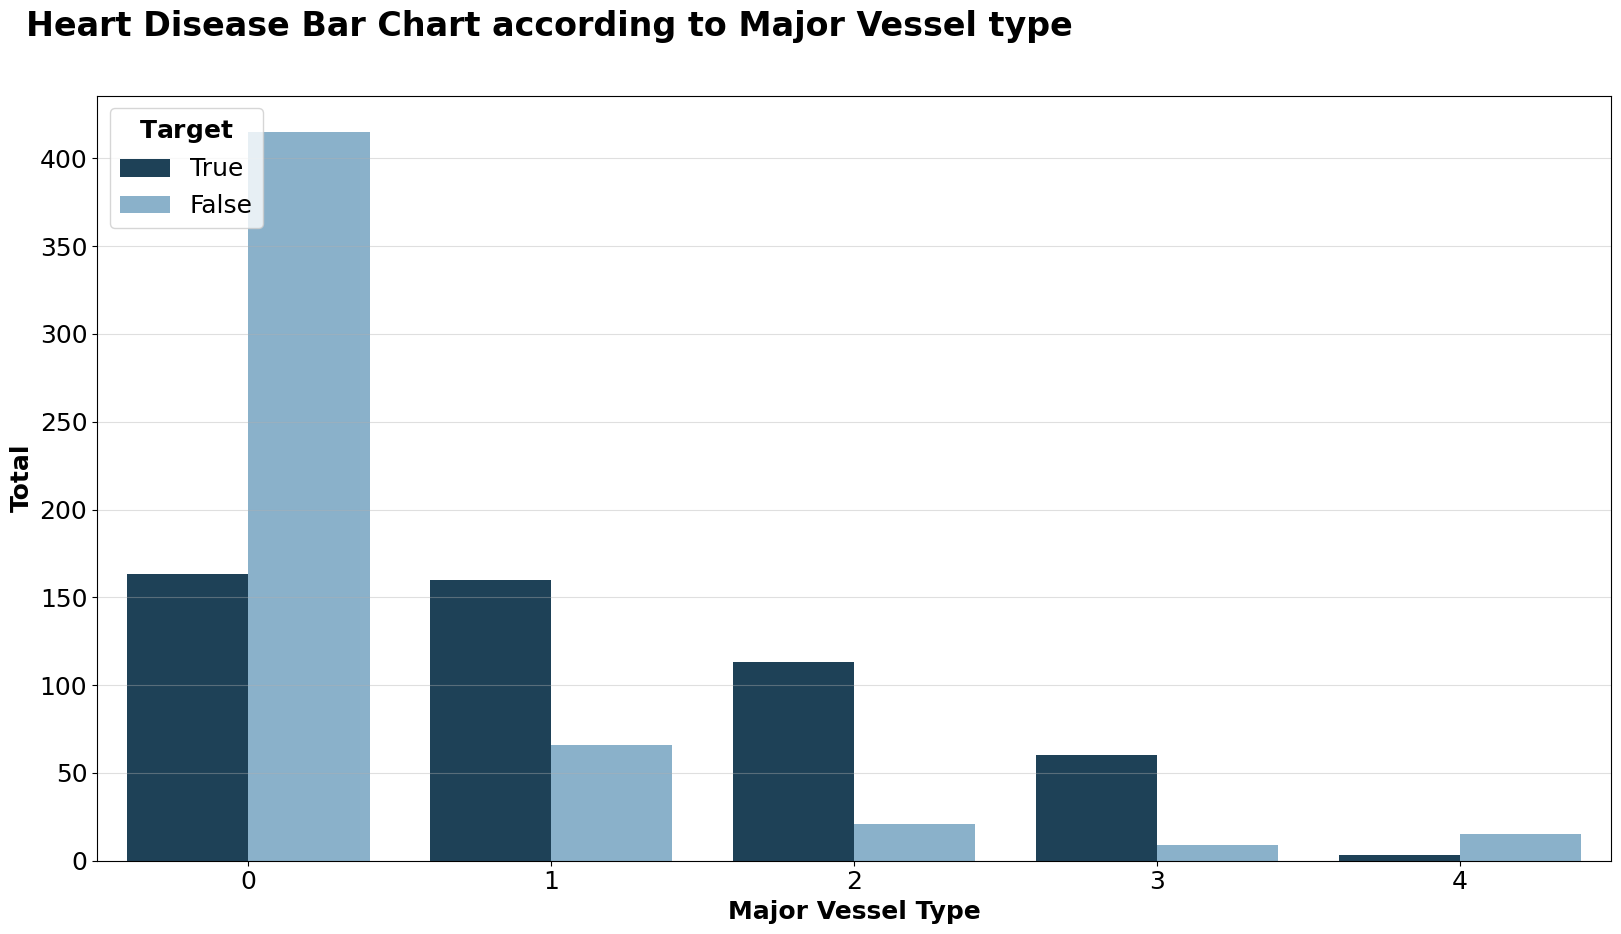

In [ ]:
labels = ['True', 'False']

colors = ['#154360','#7FB3D5']

plt.figure(figsize=(16, 9))

sns.countplot(data= heart_dataset, x='ca',hue='target', palette=colors)

plt.suptitle('Heart Disease Bar Chart according to Major Vessel type', fontweight='700',
             x=0, y=1.05, ha='left', fontsize='24', fontfamily='sans-serif')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])

plt.xlabel('Major Vessel Type', fontfamily='sans-serif', fontweight='bold', fontsize='18')

plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold', fontsize='18')

plt.xticks(rotation=0, fontsize='18')

plt.yticks(rotation=0, fontsize='18')

plt.grid(axis='y', alpha=0.4)

plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='18',
           title_fontsize='18', loc='upper left', frameon=True);

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Visualization of Heart Disease distribution based on Resting Electrocardiographic (restecg) type</h1>
<hr>

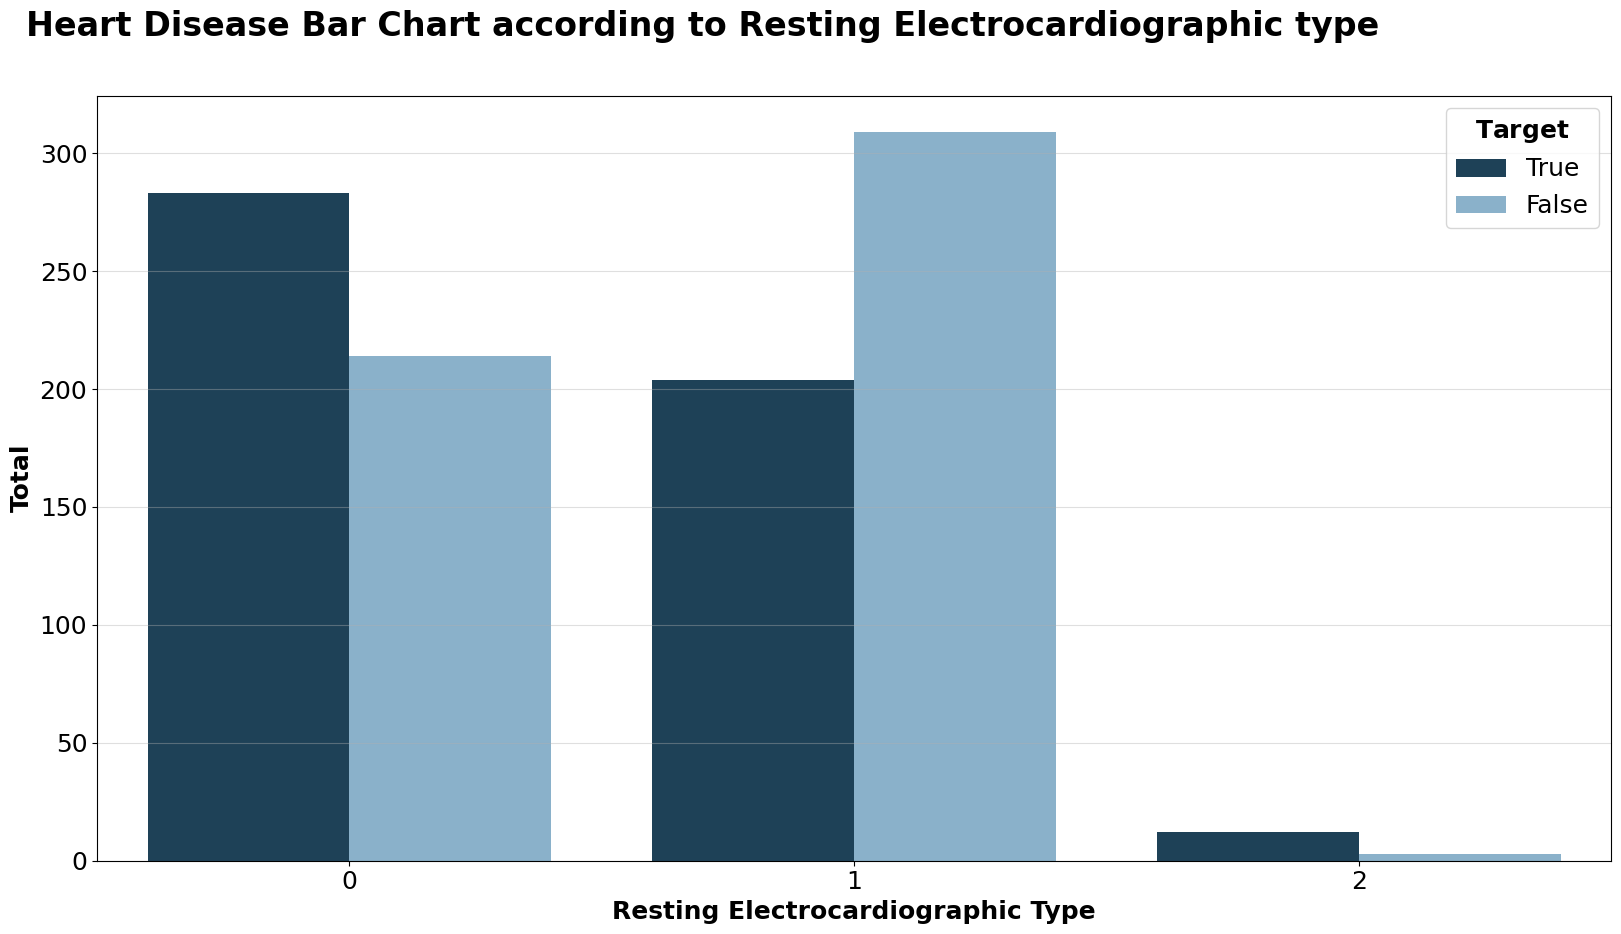

In [ ]:
labels = ['True', 'False']

colors = ['#154360','#7FB3D5']

plt.figure(figsize=(16, 9))

sns.countplot(data= heart_dataset, x='restecg',hue='target', palette=colors)

plt.suptitle('Heart Disease Bar Chart according to Resting Electrocardiographic type', fontweight='700',
             x=0, y=1.05, ha='left', fontsize='24', fontfamily='sans-serif')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])

plt.xlabel('Resting Electrocardiographic Type', fontfamily='sans-serif', fontweight='bold', fontsize='18')

plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold', fontsize='18')

plt.xticks(rotation=0, fontsize='18')

plt.yticks(rotation=0, fontsize='18')

plt.grid(axis='y', alpha=0.4)

plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='18',
           title_fontsize='18', loc='upper right', frameon=True);

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Correlation matrix of dataset</h1>
<hr>

<Axes: >

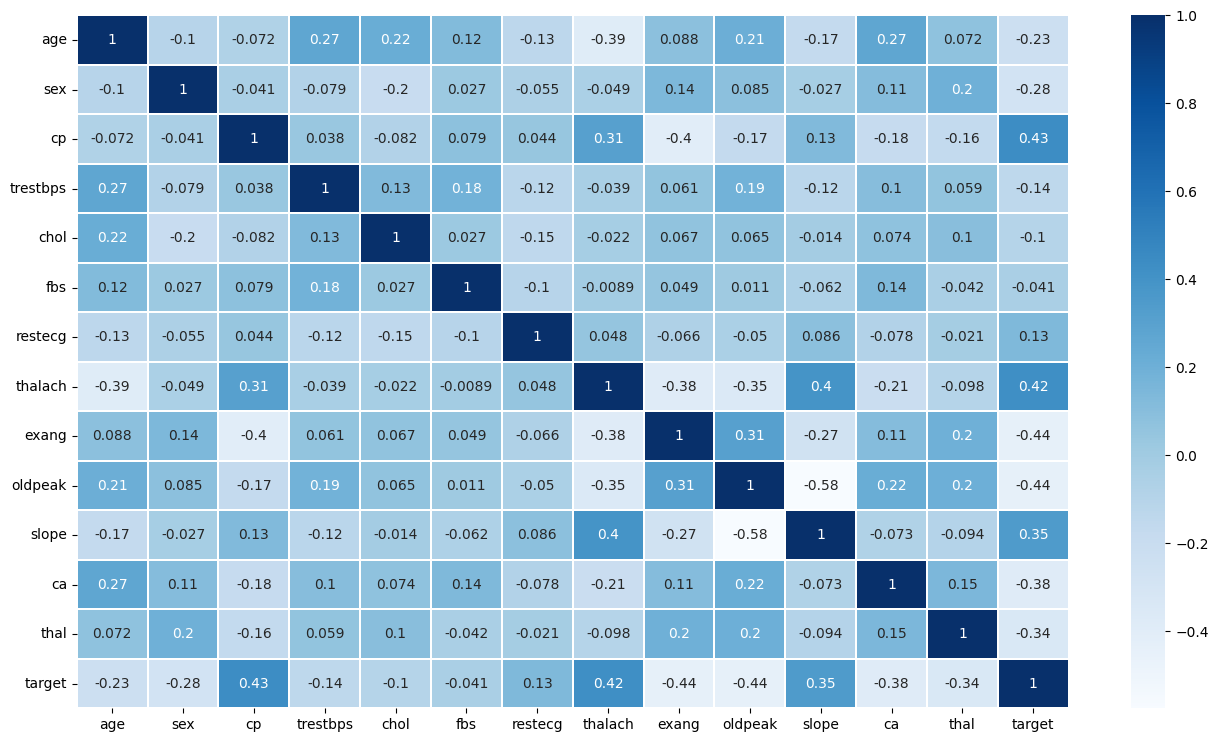

In [ ]:
plt.figure(figsize=(16, 9))
sns.heatmap(heart_dataset.corr(), annot=True, cmap='Blues', linewidths=0.1)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Data Pre-processing (OHE: One Hot Encoding)</h1>
<hr>

In [ ]:
cp = pd.get_dummies(heart_dataset['cp'], prefix='cp')
thal = pd.get_dummies(heart_dataset['thal'], prefix='thal')
slope = pd.get_dummies(heart_dataset['slope'], prefix='slope')

frames = [heart_dataset, cp, thal, slope]
heart_dataset = pd.concat(frames, axis = 1)

In [ ]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Drop Unnecessary Columns after OHE</h1>
<hr>

In [ ]:
heart_dataset = heart_dataset.drop(columns = ['cp', 'thal', 'slope'])

In [ ]:
heart_dataset.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   trestbps  1025 non-null   int64  
 3   chol      1025 non-null   int64  
 4   fbs       1025 non-null   int64  
 5   restecg   1025 non-null   int64  
 6   thalach   1025 non-null   int64  
 7   exang     1025 non-null   int64  
 8   oldpeak   1025 non-null   float64
 9   ca        1025 non-null   int64  
 10  target    1025 non-null   int64  
 11  cp_0      1025 non-null   uint8  
 12  cp_1      1025 non-null   uint8  
 13  cp_2      1025 non-null   uint8  
 14  cp_3      1025 non-null   uint8  
 15  thal_0    1025 non-null   uint8  
 16  thal_1    1025 non-null   uint8  
 17  thal_2    1025 non-null   uint8  
 18  thal_3    1025 non-null   uint8  
 19  slope_0   1025 non-null   uint8  
 20  slope_1   1025 non-null   uint

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Separating Dataset for Training and Testing</h1>
<hr>

In [ ]:
x = heart_dataset.drop(['target'], axis=1)
y = heart_dataset['target']

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Data Normalization using Min-Max Scaler</h1>
<hr>

In [ ]:
x = MinMaxScaler().fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Implementation of Machine Learning Models</h1>
<hr>

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #2980B9; text-align: center; line-height: 1.25;">Model: KNN - K Nearest Neighbour</h1>
<hr>

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train, y_train)

y_pred_KC = KNN.predict(x_test)

KCAcc = accuracy_score(y_pred_KC, y_test)
print('\033[94m KNN Accuracy: {:.2f} %'.format(KCAcc*100))

# '\033[94m' uses for blue colour

 KNN Accuracy: 95.61 %


Text(0.5, 1.05, 'Confusion Matrix for KNN Classifier')

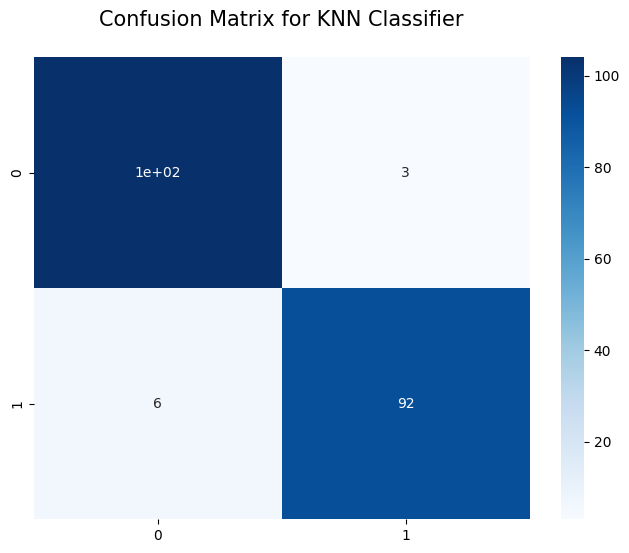

In [ ]:
# Confusion matrix of KNN Classification
knn_matrix = confusion_matrix(y_test, y_pred_KC)
plt.figure(figsize=(8,6))
sns.heatmap(knn_matrix, cmap='Blues', annot=True)
plt.title("Confusion Matrix for KNN Classifier",fontsize=15,y=1.05)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #2980B9; text-align: center; line-height: 1.25;">Model: Logistic Regression</h1>
<hr>

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

lrAcc = accuracy_score(y_pred_lr, y_test)
print('\033[94m Logistic Regression Accuracy: {:.2f} %'.format(lrAcc*100))

# '\033[94m' uses for blue colour

 Logistic Regression Accuracy: 84.88 %


Text(0.5, 1.05, 'Confusion Matrix for Logistic Regression')

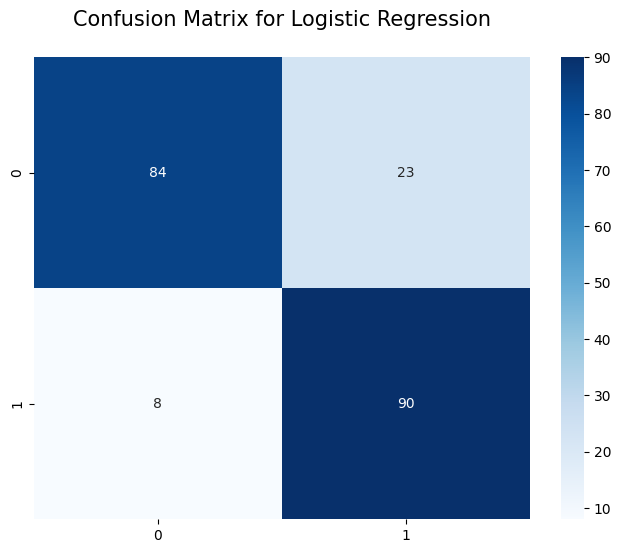

In [ ]:
# Confusion matrix of Logistic Regression
lr_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8,6))
sns.heatmap(lr_matrix, cmap='Blues', annot=True)
plt.title("Confusion Matrix for Logistic Regression",fontsize=15,y=1.05)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #2980B9; text-align: center; line-height: 1.25;">Model: SVC - Support Vector Classifier</h1>
<hr>

In [ ]:
SVM = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVM.fit(x_train, y_train)

y_pred_SVM = SVM.predict(x_test)

SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('\033[94m SVC Accuracy: {:.2f} %'.format(SVMAcc*100))

# '\033[94m' uses for blue colour

 SVC Accuracy: 83.90 %


Text(0.5, 1.05, 'Confusion Matrix for SVC Classifier')

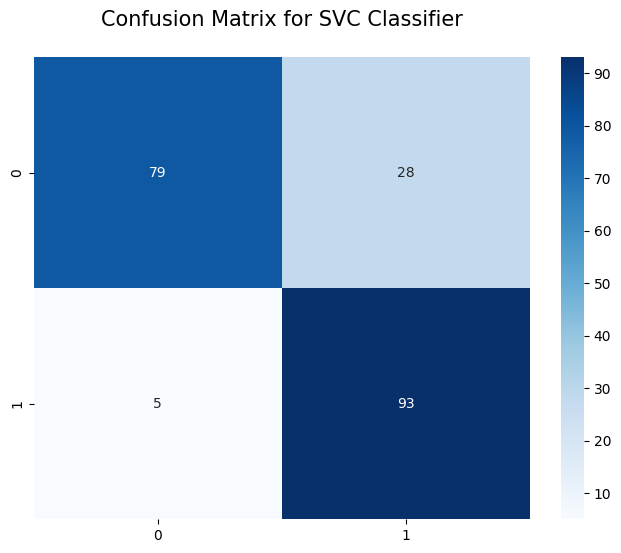

In [ ]:
# Confusion matrix of SVC Classifier
svc_matrix = confusion_matrix(y_test, y_pred_SVM)
plt.figure(figsize=(8,6))
sns.heatmap(svc_matrix, cmap='Blues', annot=True)
plt.title("Confusion Matrix for SVC Classifier",fontsize=15,y=1.05)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #2980B9; text-align: center; line-height: 1.25;">Model: DTC - Decision Tree Classifier</h1>
<hr>

In [ ]:
DT = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DT.fit(x_train, y_train)
y_pred_DTC = DT.predict(x_test)

DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('\033[94m Decision Tree Accuracy: {:.2f} %'.format(DTCAcc*100))

# '\033[94m' uses for blue colour

 Decision Tree Accuracy: 83.90 %


Text(0.5, 1.05, 'Confusion Matrix for Decision Tree Classifier')

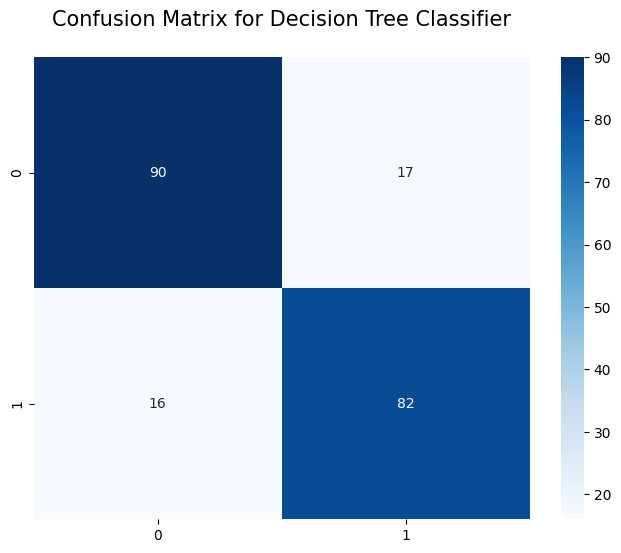

In [ ]:
# Confusion matrix of Decision Tree Classifier
dt_matrix = confusion_matrix(y_test, y_pred_DTC)
plt.figure(figsize=(8,6))
sns.heatmap(dt_matrix, cmap='Blues', annot=True)
plt.title("Confusion Matrix for Decision Tree Classifier",fontsize=15,y=1.05)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #2980B9; text-align: center; line-height: 1.25;">Model: RF - Random Forest Classifier</h1>
<hr>

In [ ]:
RF = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RF.fit(x_train, y_train)
y_pred_RF = RF.predict(x_test)

RFAcc = accuracy_score(y_pred_RF, y_test)
print("\033[94m Random Forest Accuracy: {:.2f} %".format(RFAcc*100))

# '\033[94m' uses for blue colour

 Random Forest Accuracy: 88.78 %


Text(0.5, 1.05, 'Confusion Matrix for Random Forest Classifier')

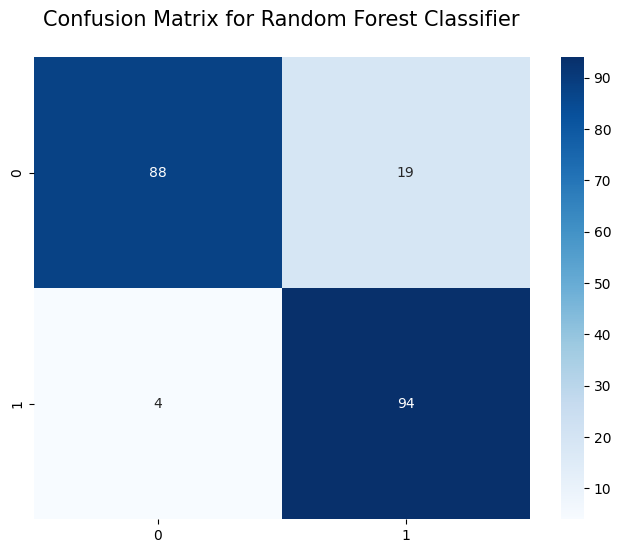

In [ ]:
# Confusion matrix of Random Forest Classifier
rf_matrix = confusion_matrix(y_test, y_pred_RF)
plt.figure(figsize=(8,6))
sns.heatmap(rf_matrix, cmap='Blues', annot=True)
plt.title("Confusion Matrix for Random Forest Classifier",fontsize=15,y=1.05)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #2980B9; text-align: center; line-height: 1.25;">Model: XGB Classifier</h1>
<hr>

In [ ]:
# XGB using hyperparameter tuning,
xgb_clf = xgb.XGBClassifier(objective='multi:softmax',
                            num_class=3,
                            missing=1,
                            gamma=0,
                            learning_rate=0.1,
                            max_depth=3,
                            reg_lambda=1,
                            subsample=1,
                            colsample_bytree=1,
                            early_stopping_rounds=10,
                            eval_metric=['merror','mlogloss'],
                            seed=42)
xgb_clf.fit(x_train,
            y_train,
            verbose=0,
            eval_set=[(x_train, y_train), (x_test, y_test)])

y_pred = xgb_clf.predict(x_test)
xgbh_hyp_acc = accuracy_score(y_test, y_pred)
print('\033[94mAccuracy: {:.2f} %'.format(xgbh_hyp_acc*100))

# '\033[94m' uses for blue colour

Accuracy: 93.17 %


Text(0.5, 1.05, 'Confusion Matrix for XGB Classifier')

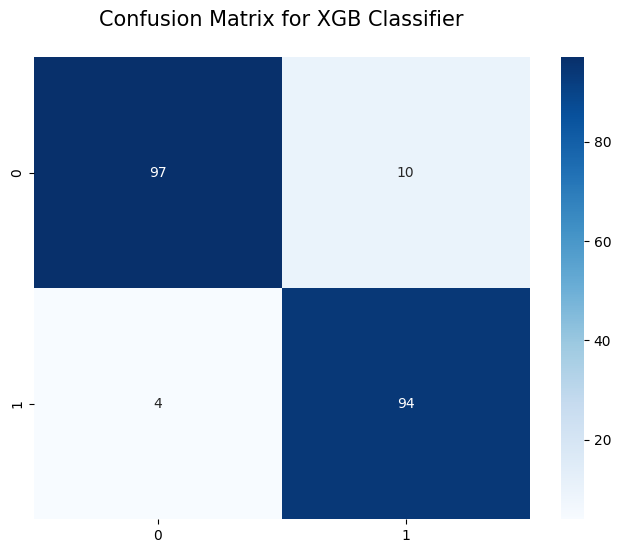

In [ ]:
# Confusion matrix of XGB Classifier
xgb_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(xgb_matrix, cmap='Blues', annot=True)
plt.title("Confusion Matrix for XGB Classifier",fontsize=15,y=1.05)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Comparison among Model's Accuracy</h1>
<hr>

In [ ]:
compare = pd.DataFrame({'Model': ['K-Nearest Neighbour', 'Support Vector Classifier',
                        'Decision Tree', 'Random Forest', 'Logistic Regression', 'XGB Classifier'],
                        'Accuracy': [KCAcc*100, SVMAcc*100, DTCAcc*100, RFAcc*100, lrAcc*100, xgbh_hyp_acc*100]})

compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='Blues').hide_index()

Model,Accuracy
K-Nearest Neighbour,95.609756
XGB Classifier,93.170732
Random Forest,88.780488
Logistic Regression,84.878049
Support Vector Classifier,83.902439
Decision Tree,83.902439


# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">Conclusions</h1>
<hr>

## <div style="font-family: Trebuchet MS; background-color: #1F618D; color: #FFFFFF; padding: 12px; line-height: 1.5; text-align: center;">After using of <b style="color: #F4D03F">K-Nearest Neighbour</b>, <b style="color: #F4D03F">Support Vector Machine</b>, <b style="color: #F4D03F">Decision Tree</b>, <b style="color: #F4D03F">Random Forest</b>, we got accuracy score of individual ML Algorithms. Then we have done comparison among accuracy scores of above mentioned algorithms. Now, we are seeing that, <b style="color: #F4D03F">KNN (K-Nearest Neighbour) has the highest accuracy score (~96%)</b> among all. <b style="color: #F4D03F">So, we can use KNN Algorithm for Heart Disease Prediction for better accuracy than others.</b></div>

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #2980B9; text-align: center; line-height: 1.25;">THANK YOU</h1>
<hr>